In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [ ]:
PATH ='/content/drive/My Drive/new_dataset'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_heavy_dir = os.path.join(train_dir, 'heavy') 
train_light_dir = os.path.join(train_dir, 'light') 
train_moderate_dir = os.path.join(train_dir, 'moderate') 

num_heavy_tr = len(os.listdir(train_heavy_dir))
num_light_tr = len(os.listdir(train_light_dir ))
num_moderate_tr = len(os.listdir(train_moderate_dir ))
total_train = num_heavy_tr + num_light_tr+num_moderate_tr

print('total training heavy traffic images:', num_heavy_tr)
print('total training light traffic images:', num_light_tr)
print('total training moderate traffic images:', num_moderate_tr)

print("Total training images:", total_train)


total training heavy traffic images: 469
total training light traffic images: 798
total training moderate traffic images: 261
Total training images: 1528


In [ ]:
validation_heavy_dir = os.path.join(validation_dir, 'heavy') # directory with our test heavy traffic pictures
validation_light_dir = os.path.join(validation_dir, 'light')  # directory with our test light traffic pictures
validation_moderate_dir = os.path.join(validation_dir, 'moderate')   # directory with our test moderate traffic pictures

num_heavy_test = len(os.listdir(validation_heavy_dir))
num_light_test = len(os.listdir(validation_light_dir ))
num_moderate_test = len(os.listdir(validation_moderate_dir ))
total_test = num_heavy_test + num_light_test+num_moderate_test

print('total training heavy traffic images:', num_heavy_test)
print('total training light traffic images:', num_light_test)
print('total training moderate traffic images:', num_moderate_test)


print("Total training images:", total_test)

total training heavy traffic images: 148
total training light traffic images: 56
total training moderate traffic images: 84
Total training images: 288


In [ ]:
batch_size =32
#epochs =50
IMG_HEIGHT =224
IMG_WIDTH =224
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training da
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our valida
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
 directory=train_dir,
 shuffle=True,
 target_size=(IMG_HEIGHT, IMG_WIDTH))
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
 directory=validation_dir,
 target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1528 images belonging to 3 classes.
Found 288 images belonging to 3 classes.


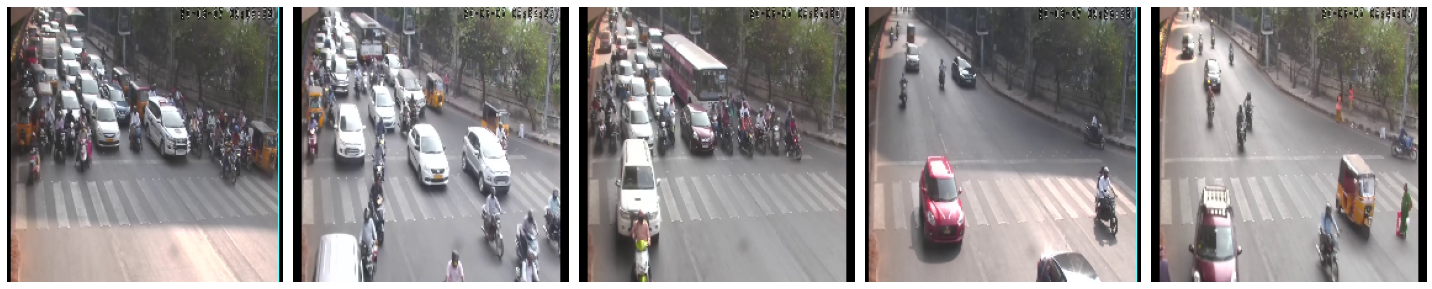

In [ ]:
sample_train_x,train_y = next(train_data_gen)
import matplotlib.image as mpimg

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_train_x[:5])

In [ ]:
print(train_y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt
model =VGG16(input_shape=(224,224,3),include_top=False,
                                               weights='imagenet')


regularizer = tf.keras.regularizers.l2(0.01)

for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)





for layer in model.layers[:11]:
  layer.trainable=False

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Input
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
Model = Sequential()
for layer in model.layers[:11]:
  layer.trainable=True
  Model.add(layer)
c=0  
for layer in model.layers[11:]:
  Model.add(layer)
  c+=1
  if c%4==0:
    Model.add(Dropout(0.3)) 
#Model.add(Flatten())
#Model.add(Dense(units=4096,activation="relu"))


Model.add(GlobalAveragePooling2D())
Model.add(Dense(units=4098,activation="relu"))
#Model.add(Dropout(0.3))
Model.add(Dense(units=4098,activation="relu"))
#Model.add(Dropout(0.3))
Model.add(Dense(units=3, activation="softmax"))


In [ ]:
Model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(momentum=0.5),metrics=['accuracy'])
Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
history = Model.fit(train_data_gen, steps_per_epoch=total_train//32,epochs=30,validation_data=val_data_gen,validation_steps=total_test//32)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/47 [..............................] - ETA: 29:25 - loss: 1.1389 - accuracy: 0.1562

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/47 [>.............................] - ETA: 25:44 - loss: 1.0708 - accuracy: 0.3958

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/47 [=>............................] - ETA: 25:39 - loss: 1.0277 - accuracy: 0.4453

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/47 [==>...........................] - ETA: 23:47 - loss: 1.0135 - accuracy: 0.4844

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/47 [====>.........................] - ETA: 21:53 - loss: 0.9627 - accuracy: 0.5035

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/47 [======>.......................] - ETA: 20:13 - loss: 0.9836 - accuracy: 0.5142

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/47 [======>.......................] - ETA: 19:38 - loss: 0.9815 - accuracy: 0.5182

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/47 [=======>......................] - ETA: 18:36 - loss: 0.9738 - accuracy: 0.5201

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/47 [========>.....................] - ETA: 18:09 - loss: 0.9680 - accuracy: 0.5271

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/47 [=========>....................] - ETA: 16:58 - loss: 0.9490 - accuracy: 0.5441

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/47 [==========>...................] - ETA: 16:35 - loss: 0.9346 - accuracy: 0.5573

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/47 [===========>..................] - ETA: 16:00 - loss: 0.9193 - accuracy: 0.5658

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/47 [===========>..................] - ETA: 15:36 - loss: 0.9028 - accuracy: 0.5766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/47 [=============>................] - ETA: 14:21 - loss: 0.8797 - accuracy: 0.5909

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/47 [=============>................] - ETA: 13:48 - loss: 0.8759 - accuracy: 0.5951

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/47 [==============>...............] - ETA: 13:16 - loss: 0.9089 - accuracy: 0.5924

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/47 [==============>...............] - ETA: 12:44 - loss: 0.9133 - accuracy: 0.5900

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/47 [================>.............] - ETA: 11:31 - loss: 0.9195 - accuracy: 0.5891

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/47 [================>.............] - ETA: 10:55 - loss: 0.9227 - accuracy: 0.5859

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/47 [=================>............] - ETA: 10:19 - loss: 0.9212 - accuracy: 0.5916

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/47 [==================>...........] - ETA: 9:44 - loss: 0.9169 - accuracy: 0.5990 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/47 [==================>...........] - ETA: 9:14 - loss: 0.9156 - accuracy: 0.5968

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/47 [===================>..........] - ETA: 8:40 - loss: 0.9049 - accuracy: 0.6055

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/47 [====================>.........] - ETA: 7:28 - loss: 0.8797 - accuracy: 0.6232

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/47 [======================>.......] - ETA: 5:43 - loss: 0.8562 - accuracy: 0.6343

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


41/47 [=========================>....] - ETA: 3:18 - loss: 0.8767 - accuracy: 0.6281

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


42/47 [=========================>....] - ETA: 2:45 - loss: 0.8839 - accuracy: 0.6235

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


43/47 [==========================>...] - ETA: 2:12 - loss: 0.8828 - accuracy: 0.6257

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


44/47 [===========================>..] - ETA: 1:40 - loss: 0.8812 - accuracy: 0.6286

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


45/47 [===========================>..] - ETA: 1:06 - loss: 0.8765 - accuracy: 0.6327

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


46/47 [============================>.] - ETA: 33s - loss: 0.8740 - accuracy: 0.6339 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


47/47 [==============================] - 1585s 34s/step - loss: 0.8653 - accuracy: 0.6384 - val_loss: 0.6649 - val_accuracy: 0.6910
Epoch 2/30
47/47 [==============================] - 91s 2s/step - loss: 0.5019 - accuracy: 0.7888 - val_loss: 0.3580 - val_accuracy: 0.8368
Epoch 3/30
47/47 [==============================] - 72s 2s/step - loss: 0.3291 - accuracy: 0.8697 - val_loss: 1.3144 - val_accuracy: 0.4167
Epoch 4/30
47/47 [==============================] - 72s 2s/step - loss: 0.2982 - accuracy: 0.8850 - val_loss: 0.2772 - val_accuracy: 0.8438
Epoch 5/30
47/47 [==============================] - 72s 2s/step - loss: 0.2341 - accuracy: 0.8964 - val_loss: 0.3496 - val_accuracy: 0.8368
Epoch 6/30
47/47 [==============================] - 72s 2s/step - loss: 0.1805 - accuracy: 0.9298 - val_loss: 0.2321 - val_accuracy: 0.8438
Epoch 7/30
47/47 [==============================] - 71s 2s/step - loss: 0.1904 - accuracy: 0.9258 - val_loss: 0.6313 - val_accuracy: 0.7778
Epoch 8/30
47/47 [==========

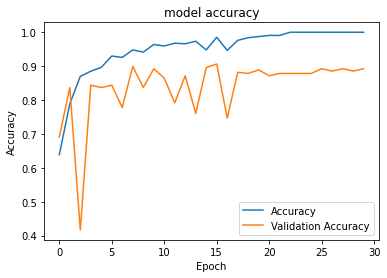

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

In [ ]:
Model.evaluate(val_data_gen)

9/9 [==============================] - 11s 1s/step


[0.14142099022865295, 0.8923611044883728]

In [ ]:
Model.save("/content/drive/My Drive/Traffic_Densen(VGG).h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
